# Decision Tree 

## Importing all the required librarires

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split,validation_curve, GridSearchCV
from sklearn import tree
plt.style.use("seaborn")


## Importing the data files, using pandas

In [ ]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


## Assigning the global X and y values from the training set

In [ ]:
X = []
y = []
for row in df_train.iterrows() :
    label = row[1][0] # label (the number visible in the image)
    image = list(row[1][1:]) # image information as list, without label
    image = np.array(image) / 255
    X.append(image)
    y.append(label)

X = np.array(X)
y = np.array(y)
print(len(X))
print(len(y))

60000
60000


## Splitting the data into train and test to fit and validate the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(len(X_train), len(y_train))
print(X_train[1].shape)


54000 54000
(784,)


## Assigning the training data to the Decision Tree classifier to learn

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred[0:20], ".....")
print(y_test[0:20], ".....")
print(metrics.accuracy_score(y_test, y_pred))

[7 3 8 9 3 9 7 7 5 4 2 5 6 4 1 7 4 8 0 7] .....
[7 3 8 9 3 9 7 7 5 4 2 5 6 8 1 7 4 8 0 7] .....
0.871


## Preparing the test set

In [ ]:
X_new = []
for row in df_test.iterrows() :
    image = list(row[1][1:])
    image = np.array(image) / 255
    X_new.append(image)
X_new = np.array(X_new)
print(len(X_new))
print(len(df_test))

10000
10000


## Predicting the classifier on the test set

In [ ]:
y_new_pred = clf.predict(X_new)
print(y_new_pred)

[7 2 1 ... 4 5 6]


In [ ]:
print("Cohen Kappa score is " + str(cohen_kappa_score(y_test, y_pred)))
print("Accuracy is " + str(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test,(y_pred)))

Cohen Kappa score is 0.8566264601239718
Accuracy is 0.871
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       624
           1       0.93      0.96      0.94       654
           2       0.86      0.87      0.86       572
           3       0.83      0.83      0.83       589
           4       0.87      0.87      0.87       580
           5       0.79      0.83      0.81       551
           6       0.89      0.91      0.90       580
           7       0.91      0.89      0.90       633
           8       0.84      0.79      0.82       585
           9       0.84      0.85      0.85       632

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



## Printing confusion matrix 

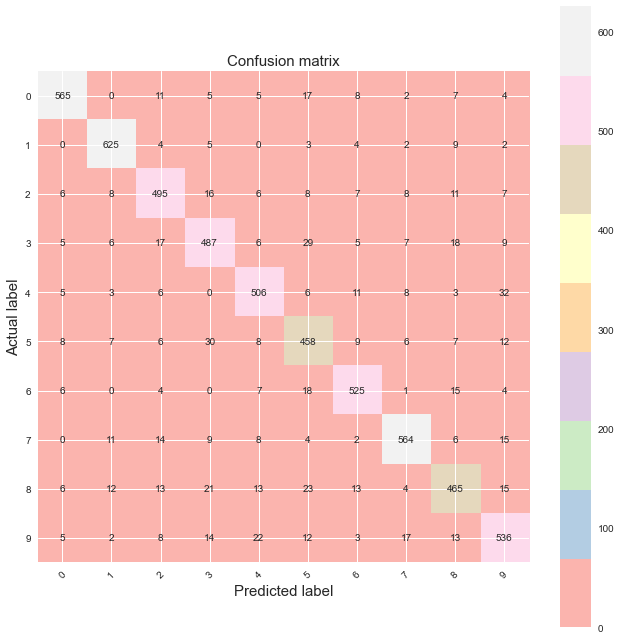

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.savefig('Decision Tree -Confusion Matrix')